<div style="font-size:1.4em; margin-bottom:2em">
    <div style="float:right; line-height:1.2em;">GET Lab<br />Paderborn University</div>
  <div>SS 2021</div>
</div>
<div style="clear:both"></div>
<div style="text-align:center; font-size:1.8em;">
  Digital Image Processing II<br />Task Sheet 13
</div>

<hr>

### Overview

The objective of this task sheet is to implement and test a neural network to solve the XOR problem. This problem cannot be solved using a single linear decision boundary. The XOR problem is formed by assigning the XOR false values to one class ($c_1$), and the truth values to another ($c_2$). In this example, the binary coordinates have been rearranged for mathematical convenience. Note that in the neural network, the bias is not explicitly displayed with an additional arrow (which is usual) and that each neuron (node) has only a single output value which is send to all neurons in the next layer.

The following figure shows the XOR problem to be studied, the fully connected neural network to be used, and the activation function to be used:

<center><img src="images/overview.png" width="850px" style="margin:10px;" /></center>

Backpropagation, and therefore the training of neural networks, is usually formalized in terms of a matrix formulation. This leads to compact and easy to implement computations. Each layer is assigned an index $\ell$. The training feature vectors (patterns) are summarized in a single pattern matrix $\mathbf{X}$, where each column represents one pattern. The desired classification (the ideal activation values of the output neurons) is represented by the class membership matrix $\mathbf{R}$. The matrices are given as follows:

$$
\mathbf{X} =
\begin{bmatrix}
1 & -1 & -1 &  1\\
1 & -1 &  1 & -1
\end{bmatrix},\
\mathbf{R} =
\begin{bmatrix}
1 & 1 & 0 & 0\\
0 & 0 & 1 & 1
\end{bmatrix}
$$

The input weights of each layer are summarized in a weight matrix $\mathbf{M}(\ell)$ and the bias values in a bias vector $\mathbf{b}(\ell)$. For $n_p$ training patterns (we have $n_p = 4$), $\mathbf{b}(\ell)$ has to be concatenated $n_p$ times in the horizontal direction to form a matrix $\mathbf{B}(\ell)$. In this example, we get the following forms:

$$
\mathbf{W}(\ell) =
\begin{bmatrix}
w_{11}(\ell) & w_{12}(\ell)\\
w_{21}(\ell) & w_{22}(\ell)
\end{bmatrix},\
\mathbf{b}(\ell) =
\begin{bmatrix}
b_1(\ell)\\
b_2(\ell)
\end{bmatrix},\
\mathbf{B}(\ell) =
\begin{bmatrix}
b_1(\ell) & b_1(\ell) & b_1(\ell) & b_1(\ell)\\
b_2(\ell) & b_2(\ell) & b_2(\ell) & b_2(\ell)
\end{bmatrix}
$$

As shown in the figure above, the weights $w_{ij}(\ell)$ are notated as follows: the index $i$ refers to the number of the input neuron in that layer (layer $\ell$) and $j$ to the number of the sending neuron in the previous layer ($\ell-1$). The net inputs of the neurons for all feature vectors in one layer are summarized in a matrix $\mathbf{Z}(\ell)$. The corresponding activation values are summarized in a matrix $\mathbf{A}(\ell) = h(\mathbf{Z}(\ell))$, where $h(\cdot)$ denotes the activation function. The activation function is applied separately to each element of $\mathbf{Z}(\ell)$. Each column of $\mathbf{A}(\ell)$ represents the activation values of the neurons in layer $\ell$ for the corresponding training pattern (the corresponding column in $\mathbf{X}$). The backpropagated errors are summarized in a matrix $\mathbf{D}(\ell)$. The learning rate is denoted by $\alpha$.

The backpropagation algorithm for one epoch can then be summarized as follows, where $\odot$ refers to elementwise multiplication (carefully look for $\ell$ and $L$):

<center><img src="images/backpropagation.png" width="700px" style="margin:10px;" /></center>

---

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

dpi = plt.rcParams['figure.dpi']

# plot image in original size
def plot_img_orig(img):
    fig = plt.figure(figsize = (img.shape[1]/dpi, img.shape[0]/dpi))
    fig.add_axes([0, 0, 1, 1])
    plt.axis('off')
    plt.imshow(img, cmap='gray', vmin=0, vmax=255) # cmap parameter is ignored for RGB(A) data
    plt.show()

#### <span style="color: RoyalBlue; font-weight: bold;">Task 13.1</span> Fully Connected Neural Networks and Backpropagation

Implement / solve the following tasks:
1. Implement the neural network from the overview and train it with the four given training patterns using the backpropagation algorithm.
2. Print and analyze the activation matrix $\mathbf{A}(3)$ of the output layer after an appropriate number of epochs. Does it converge?
3. Use the trained network to classify regularly sampled patterns in the 2D plane and plot the result.
4. Plot and analyze the corresponding activation values of the first output neuron, for example by using a grayvalue image.

Desired result:
[[1 1 0 0]
 [0 0 1 1]]

Result for epoch 0:
[[0.4984994  0.55885515 0.39728459 0.65650188]
 [0.83815994 0.88931122 0.95943112 0.63649247]]

Result for epoch 100:
[[0.79574991 0.7957506  0.26183939 0.19494975]
 [0.16209913 0.16210259 0.7473101  0.87850316]]

Result for epoch 200:
[[0.89578842 0.89578786 0.13132748 0.10149223]
 [0.09179856 0.09179913 0.87669884 0.91554536]]

Result for epoch 300:
[[0.92369739 0.92369721 0.0953027  0.0749044 ]
 [0.07013714 0.07013733 0.90943289 0.93297216]]

Result for epoch 400:
[[0.93748453 0.93748444 0.07772762 0.06160881]
 [0.0586989  0.05869899 0.92546099 0.94308484]]



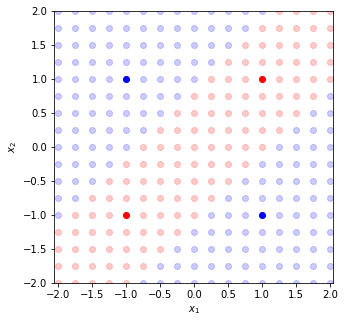

Decision surface:


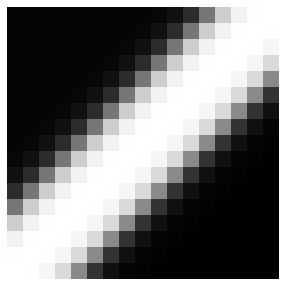

In [2]:
# write your code here

# parameters
alpha = 1.0
n_epochs = 500

# sigmoid activation function
def sigmoid(z):
    return 1/(1+np.exp(-z))

# derivative of the sigmoid activation function 
def sigmoid_diff(z):
    return sigmoid(z)*(1-sigmoid(z))

# random initialization of the weight and bias matrices
# layer 2
W2 = np.array([[0.18, -0.87], [-0.72, 0.41]])
b2 = np.array([0.01, 0.01]).reshape(2, 1) # reshape to get column vector
B2 = np.hstack((b2, b2, b2, b2))

# layer 3 (output layer, l = L)
W3 = np.array([[1.18, -0.97], [-0.72, 4.41]])
b3 = np.array([0.01, 0.01]).reshape(2, 1) # reshape to get column vector
B3 = np.hstack((b3, b3, b3, b3))

# step 1: input patterns and desired output
A1 = np.array([[1, -1, -1, 1], [1, -1, 1, -1]])
R = np.array([[1, 1, 0, 0], [0, 0, 1, 1]]) # top row: c1, bottom row: c2
#print(A1)

# print the desired classification matrix
print("Desired result:"); print(str(R) + "\n")

# k indicates the current epoch
for k in range(n_epochs):
    # step 2: forward pass
    # layer 2
    Z2 = (W2 @ A1) + B2
    A2 = sigmoid(Z2)
    h_diff_Z2 = sigmoid_diff(Z2)

    # layer 3 (output layer)
    Z3 = (W3 @ A2) + B3
    A3 = sigmoid(Z3)
    h_diff_Z3 = sigmoid_diff(Z3)

    D3 = np.multiply((A3-R), h_diff_Z3) # elementwise multiplication

    # step 3: backpropagation - only required for layer 2 here
    D2 = np.multiply((np.transpose(W3) @ D3), h_diff_Z2)

    # step 4: update weights and biases
    # layer 2
    W2 = W2 - alpha * D2 @ np.transpose(A1)
    b2 = b2 - alpha * (np.sum(D2, axis=1)).reshape(2, 1) # second part gives row vector without reshape
    B2 = np.hstack((b2, b2, b2, b2))

    # layer 3
    W3 = W3 - alpha * D3 @ np.transpose(A2)
    b3 = b3 - alpha * (np.sum(D3, axis=1)).reshape(2, 1) # second part gives row vector without reshape
    B3 = np.hstack((b3, b3, b3, b3))
    
    # optional: print last activation values
    if (k % 100) == 0:
        print("Result for epoch " + str(k) + ":")
        print(str(A3) + "\n")
        
# regularly sampled patterns in the 2D plane
pos = np.arange(-2, 2.25, 0.25) # to generate pairs of x1 and x2

# plot preparation
plt.figure(figsize=(5, 5))
plt.xlabel("$x_1$"); plt.ylabel("$x_2$")
plt.axis("equal")
plt.xlim(-2, 2); plt.ylim(-2, 2)

# image to visualize the activation value of the first neuron
img = np.zeros((len(pos), len(pos)))

# classify each pair (pattern) of x1 and x2 
for i in range (len(pos)):
    for j in range (len(pos)):
        # input pattern
        A1 = np.array([pos[i], pos[j]]).reshape(2, 1)
        
        # forward pass through layer 2
        Z2 = (W2 @ A1) + b2 # note that b2 is a single col vector
        A2 = sigmoid(Z2)

        # forward pass through layer 3 (output layer)
        Z3 = (W3 @ A2) + b3
        A3 = sigmoid(Z3)
        
        # save the activation value of the first neuron
        img[i, j] = A3[0]
        
        # plot
        if A3[0] > 0.5: # class 1
            plt.plot(pos[i], pos[j], 'ro', alpha=0.2, label='class 1')
        else: # class 2
            plt.plot(pos[i], pos[j], 'bo', alpha=0.2, label='class 2')

# final plot
plt.plot([1, -1], [1, -1], 'ro')
plt.plot([-1, 1], [1, -1], 'bo')
plt.show()

# normalize and resize the image
img = cv2.normalize(img, None, 0, 255, cv2.NORM_MINMAX)
img = cv2.flip(img, 1) # y axis in image points downwards
img = cv2.resize(img, (0, 0), fx=16, fy=16, interpolation=cv2.INTER_NEAREST)

print("Decision surface:")
plot_img_orig(img)